# Modeling Trajectories of Different Projectiles

The following example utilizes data from the research paper entitled, "[Discovery of Physics from Data: Univeral Laws and Dicrepancies](https://arxiv.org/pdf/1906.07906.pdf)". The [data](https://github.com/briandesilva/discovery-of-physics-from-data/blob/master/data/Ball_drops_data.xls) will be used to demonstrate the functionality and effectiveness of SINDy.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysindy as ps

import warnings

### Recorded Trajectories of Projectiles

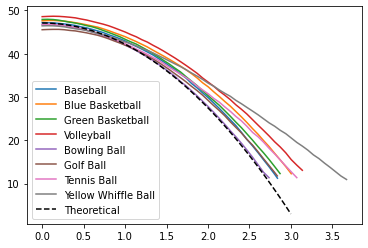

In [2]:
#Import Data
data = "~/final/code/Ball_drops_data.xls"
bd_data = pd.read_excel(data, sheet_name = None)

#Delete Repeating Rows
del bd_data["Whiffle Ball 1"]
del bd_data["Whiffle Ball 2"]
del bd_data["Orange Whiffle Ball"]

#Filter and mask each projectile
baseb = bd_data["Baseball"]
bbask = bd_data["Blue Basketball"]
gbask = bd_data["Green Basketball"]
volley = bd_data["Volleyball"]
bowl = bd_data["Bowling Ball"]
gball = bd_data["Golf Ball"]
tball = bd_data["Tennis Ball"]
ywb = bd_data["Yellow Whiffle Ball"]

#Baseball
baseb = baseb[baseb["Drop #"] == 2]
basebx = baseb["Time (s)"]
baseby = baseb["Height (m)"]

#Blue Basketball
bbask = bbask[bbask["Drop #"] == 2]
bbaskx = bbask["Time (s)"]
bbasky = bbask["Height (m)"]

#Green Basketball
gbask = gbask[gbask["Drop #"] == 2]
gbaskx = gbask["Time (s)"]
gbasky = gbask["Height (m)"]

#Volleyball
volley = volley[volley["Drop #"] == 2]
volleyx = volley["Time (s)"]
volleyy = volley["Height (m)"]

#Bowling Ball
bowl = bowl[bowl["Drop #"] == 2]
bowlx = bowl["Time (s)"]
bowly = bowl["Height (m)"]

#Golf Ball
gball = gball[gball["Drop #"] == 2]
gballx = gball["Time (s)"]
gbally = gball["Height (m)"]

#Tennis Ball
tball = tball[tball["Drop #"] == 2]
tballx = tball["Time (s)"]
tbally = tball["Height (m)"]

#Yellow Whiffle Ball
ywb = ywb[ywb["Drop #"] == 2]
ywbx = ywb["Time (s)"]
ywby = ywb["Height (m)"]

#Plot trajectory of each projectile
plt.plot(basebx,baseby,label="Baseball")
plt.plot(bbaskx,bbasky,label="Blue Basketball")
plt.plot(gbaskx,gbasky,label="Green Basketball")
plt.plot(volleyx,volleyy,label="Volleyball")
plt.plot(bowlx,bowly,label="Bowling Ball")
plt.plot(gballx,gbally,label="Golf Ball")
plt.plot(tballx,tbally,label="Tennis Ball")
plt.plot(ywbx,ywby,label="Yellow Whiffle Ball")

#Plot theoretical equations of motion
t=np.linspace(0,3,51)
traj = 47.111-(9.8/2)*t**2
plt.plot(t,traj,"k--",label="Theoretical")

plt.legend()
plt.show() # x-axis = time, y-axis = height

### Predicting Theoretical Projectile Motion

SINDy will be used to test the theoretical equation for projectile motion. The initial height value used was the average starting height between all 8 projectiles.

In [3]:
#Define Equation
t = np.linspace(0,3,51)
y = 47.111-(9.8/2)*t**2
X = np.stack((t,y),axis=-1)

In [4]:
#Define values for each submodule
diff = ps.differentiation.FiniteDifference(order=2)
lib = ps.feature_library.PolynomialLibrary(degree=1)
opt = ps.optimizers.STLSQ(threshold=0.0005)

In [5]:
#Implement SINDy
model = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

model.fit(X,t=t)
model.print()

(x0)' = 1.000 1
(x1)' = -9.800 x0


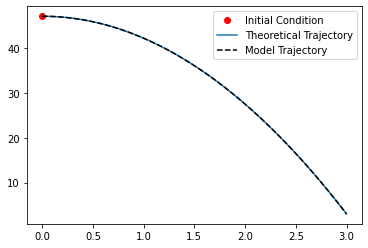

In [6]:
#Plot Theoretical Motion vs. SINDy model
sim = model.simulate([0,47.111],t=t)

plt.plot(0,47.111,"ro",label="Initial Condition")
plt.plot(t,y,label = "Theoretical Trajectory")
plt.plot(t,sim[:,1],"--k",label="Model Trajectory")
plt.legend()
plt.show() # x-axis = time, y-axis = height

### Utilizing SINDy on Actual Projectile Data

SINDy will be used on the actual projectile data that was filtered in the beginning.

In [7]:
dt = basebx.iloc[1]-basebx.iloc[0] #Determines step size
print(dt)
BB = np.stack((basebx,baseby),axis=-1)

0.0666666819363


In [8]:
modelBB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelBB.fit(BB,t=dt)
modelBB.print()

(x0)' = 0.244 1 + 0.146 x0 + 0.015 x1
(x1)' = 13.037 1 + -11.421 x0 + -0.255 x1


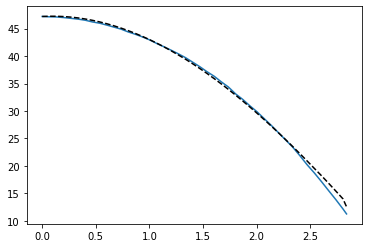

In [9]:
y0BB = baseby.iloc[0]
simBB=modelBB.simulate([0,y0BB],t=np.linspace(0,basebx.iloc[-1],len(basebx))) #Creates SINDy Model

plt.plot(basebx,baseby)
plt.plot(basebx,simBB[:,1],"--k")
plt.show() # x-axis = time, y-axis = height

Finally, SINDy will be used to determine the equations of motion for each of the projectiles.

In [10]:
#Prints the SINDy model equations for each projectile

print('Baseball')
modelBB.print()

BBa = np.stack((bbaskx,bbasky),axis=-1)
GBa = np.stack((gbaskx,gbasky),axis=-1)
VB = np.stack((volleyx,volleyy),axis=-1)
BoB = np.stack((bowlx,bowly),axis=-1)
GB = np.stack((gballx,gbally),axis=-1)
TB = np.stack((tballx,tbally),axis=-1)
YWB = np.stack((ywbx,ywby),axis=-1)

modelBBa = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelBBa.fit(BBa,t=dt)
print('Blue Basketball')
modelBBa.print()

modelGBa = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelGBa.fit(GBa,t=dt)
print('Green Basketball')
modelGBa.print()

modelVB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelVB.fit(VB,t=dt)
print('Volleyball')
modelVB.print()

modelBoB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelBoB.fit(BoB,t=dt)
print('Bowling Ball')
modelBoB.print()

modelGB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelGB.fit(GB,t=dt)
print('Golf Ball')
modelGB.print()

modelTB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelTB.fit(TB,t=dt)
print('Tennis Ball')
modelTB.print()

modelYWB = ps.SINDy(
    differentiation_method = diff,
    feature_library = lib,
    optimizer = opt,
)

modelYWB.fit(YWB,t=dt)
print('Yellow Whiffle Ball')
modelYWB.print()

Baseball
(x0)' = 0.244 1 + 0.146 x0 + 0.015 x1
(x1)' = 13.037 1 + -11.421 x0 + -0.255 x1
Blue Basketball
(x0)' = 1.009 1 + -0.002 x0
(x1)' = -2.339 1 + -7.609 x0 + 0.055 x1
Green Basketball
(x0)' = 0.990 1 + 0.003 x0
(x1)' = -0.168 1 + -8.518 x0
Volleyball
(x0)' = 1.010 1 + -0.002 x0
(x1)' = 16.093 1 + -10.383 x0 + -0.303 x1
Bowling Ball
(x0)' = 0.994 1 + 0.002 x0
(x1)' = 8.487 1 + -11.234 x0 + -0.170 x1
Golf Ball
(x0)' = 0.248 1 + 0.141 x0 + 0.015 x1
(x1)' = 20.395 1 + -12.780 x0 + -0.395 x1
Tennis Ball
(x0)' = 0.998 1 + 0.001 x0
(x1)' = 11.497 1 + -9.633 x0 + -0.237 x1
Yellow Whiffle Ball
(x0)' = 0.993 1 + 0.001 x0
(x1)' = 29.542 1 + -10.120 x0 + -0.622 x1


In [11]:
#Creates Simulation
y0BBa = bbasky.iloc[0]
simBBa=modelBBa.simulate([0,y0BBa],t=np.linspace(0,bbaskx.iloc[-1],len(bbaskx)))

y0GBa = gbasky.iloc[0]
simGBa=modelGBa.simulate([0,y0GBa],t=np.linspace(0,gbaskx.iloc[-1],len(gbaskx)))

y0VB = volleyy.iloc[0]
simVB=modelVB.simulate([0,y0VB],t=np.linspace(0,volleyx.iloc[-1],len(volleyx)))

y0BoB = bowly.iloc[0]
simBoB=modelBoB.simulate([0,y0BoB],t=np.linspace(0,bowlx.iloc[-1],len(bowlx)))

y0GB = gbally.iloc[0]
simGB=modelGB.simulate([0,y0GB],t=np.linspace(0,gballx.iloc[-1],len(gballx)))

y0TB = tbally.iloc[0]
simTB=modelTB.simulate([0,y0TB],t=np.linspace(0,tballx.iloc[-1],len(tballx)))

y0YWB = ywby.iloc[0]
simYWB=modelYWB.simulate([0,y0YWB],t=np.linspace(0,ywbx.iloc[-1],len(ywbx)))

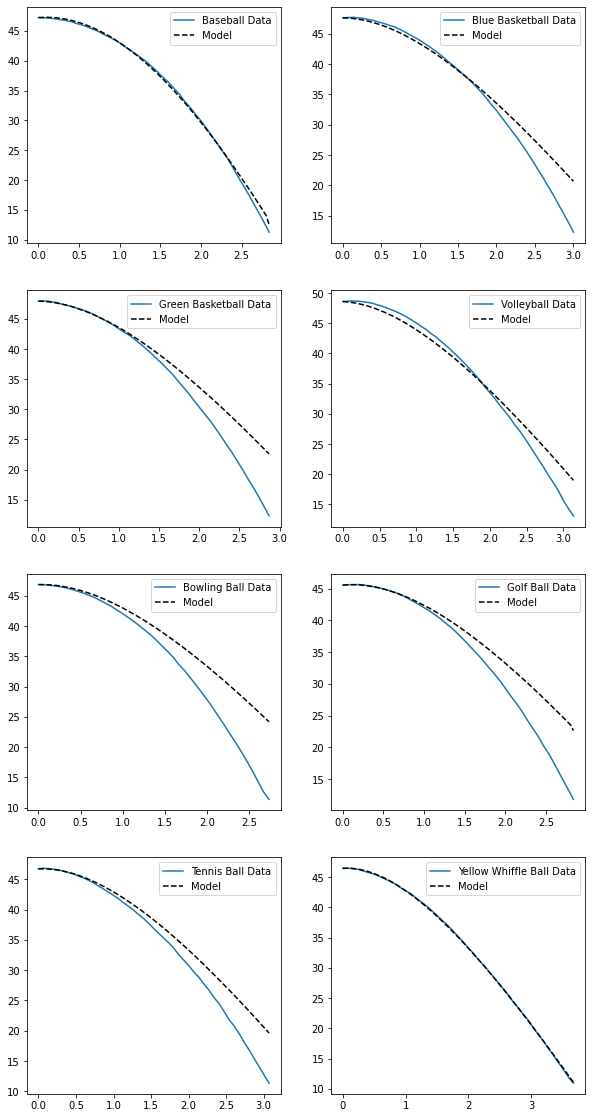

In [12]:
fig, axs = plt.subplots(4,2, figsize=(10, 20)) #Creates 8 Subplots

axs[0,0].plot(basebx,baseby,label="Baseball Data")
axs[0,0].plot(basebx,simBB[:,1],"--k",label="Model")
axs[0,0].legend()

axs[0,1].plot(bbaskx,bbasky,label="Blue Basketball Data")
axs[0,1].plot(bbaskx,simBBa[:,1],"--k",label="Model")
axs[0,1].legend()

axs[1,0].plot(gbaskx,gbasky,label="Green Basketball Data")
axs[1,0].plot(gbaskx,simGBa[:,1],"--k",label="Model")
axs[1,0].legend()

axs[1,1].plot(volleyx,volleyy,label="Volleyball Data")
axs[1,1].plot(volleyx,simVB[:,1],"--k",label="Model")
axs[1,1].legend()

axs[2,0].plot(bowlx,bowly,label="Bowling Ball Data")
axs[2,0].plot(bowlx,simBoB[:,1],"--k",label="Model")
axs[2,0].legend()

axs[2,1].plot(gballx,gbally,label="Golf Ball Data")
axs[2,1].plot(gballx,simGB[:,1],"--k",label="Model")
axs[2,1].legend()

axs[3,0].plot(tballx,tbally,label="Tennis Ball Data")
axs[3,0].plot(tballx,simTB[:,1],"--k",label="Model")
axs[3,0].legend()

axs[3,1].plot(ywbx,ywby,label="Yellow Whiffle Ball Data")
axs[3,1].plot(ywbx,simYWB[:,1],"--k",label="Model")
axs[3,1].legend()

fig.show() # x-axis = time, y-axis = height

In reference to the above figures, it appears that SINDy performed better at fitting certain data over others. Overall, SINDy performs well in creating and modeling the data to make predictions of its future behavior. It appears that the data with the best fit is that of the "Baseball and the Yellow Whiffle Ball," due to its close respemblance to the original data.